In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [5]:
# Every state election data since 1976 with votes for each state along with party name and incumbent name. 
# Elections: 1976-2016
df = pd.read_csv(r'C:\Downloads\1976-2016-president.csv')
# Arizona data will not be able to be used. 

In [6]:
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


In [7]:
# Create new columns called percent. Getting the percent of votes for each candidate.
df['Percent'] = df['candidatevotes']/df['totalvotes']

In [8]:
df.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party', 'writein', 'candidatevotes',
       'totalvotes', 'version', 'notes', 'Percent'],
      dtype='object')

In [9]:
# Select the columns you wish to drop.
to_drop = ['state_po',
          'state_fips',
          'state_cen',
          'state_ic',
          'office',
          'writein',
          'version',
          'notes']

In [10]:
df.drop(to_drop, inplace=True, axis=1)

In [11]:
df

,year,state,candidate,party,candidatevotes,totalvotes,Percent
0,1976,Alabama,"Carter, Jimmy",democrat,659170,1182850,0.557273
1,1976,Alabama,"Ford, Gerald",republican,504070,1182850,0.426149
2,1976,Alabama,"Maddox, Lester",american independent party,9198,1182850,0.007776
3,1976,Alabama,"Bubar, Benjamin """"Ben""""",prohibition,6669,1182850,0.005638
4,1976,Alabama,"Hall, Gus",communist party use,1954,1182850,0.001652
...,...,...,...,...,...,...,...
3735,2016,Wyoming,NaN,NaN,6904,258788,0.026678
3736,2016,Wyoming,NaN,independent,3224,258788,0.012458
3737,2016,Wyoming,Blank Vote,NaN,2661,258788,0.010283
3738,2016,Wyoming,"Castle, Darrell L.",constitution party,2042,258788,0.007891


In [12]:
# Creating function that determines historical percentage for each state with respect to party.
def state_leaning(x=''):
    """
    Represent state leanings based on political party.
    """
   
    state = df[df['state']==x]
    est = smf.ols('Percent ~ party', state).fit()
    return est.summary()

In [13]:
state_leaning('Virginia')
# According to the data, Virginia has historically voted for Republicans.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Percent   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     108.6
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           8.83e-28
Time:                        13:56:33   Log-Likelihood:                 104.32
No. Observations:                  56   AIC:                            -178.6
Df Residuals:                      41   BIC:                            -148.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0098      0.044      0.224      0.824      -0.079       0.098
party[T.citizens]                -0.0023      0.062     -0.037      0.970      -0.128       0.123
party[T.conservative]            -0.0092      0.062     -0.148      0.883      -0.135       0.116
party[T.constitution party]      -0.0065      0.054     -0.122      0.904      -0.115       0.102
party[T.democrat]                 0.4391      0.046      9.578      0.000       0.347       0.532
party[T.green]                   -0.0020      0.049     -0.040      0.968      -0.101       0.097
party[T.independent]              0.0220      0.047      0.468      0.642      -0.073       0.117
party[T.independent green]       -0.0078      0.062     -0.126      0.900      -0.133       0.118
party[T.libertarian]             -0.0029      0.046     -0.063      0.950      -0.096       0.090
party[T.natural law]             -0.0080      0.062     -0.128      0.899      -0.133       0.117
party[T.reform party]             0.0242      0.054      0.451      0.654      -0.084       0.133
party[T.republican]               0.4999      0.046     10.903      0.000       0.407       0.592
party[T.socialist workers]       -0.0041      0.054     -0.075      0.940      -0.113       0.105
party[T.u.s. labor]              -0.0054      0.062     -0.087      0.931      -0.131       0.120
party[T.u.s. taxpayers party]    -0.0042      0.062     -0.067      0.947      -0.130       0.121
==============================================================================
Omnibus:                       11.251   Durbin-Watson:                   2.749
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.066
Skew:                           0.858   Prob(JB):                      0.00240
Kurtosis:                       4.491   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Create a line graph function for data between republican and democrat party.
def voting_graph(x=''):
    state_name = df[df['state']==x]
    rep = state_name[state_name['party']=='republican']
    dem = state_name[state_name['party']=='democrat']
    plt.figure(figsize=(15,7))
    plt.plot(rep.year, rep.candidatevotes, label='Republican',color='red')
    plt.plot(dem.year, dem.candidatevotes, label='Democrat', color='blue')
    plt.title('Republican vs. Democrat')
    plt.grid(True)
    plt.legend()
    plt.show()

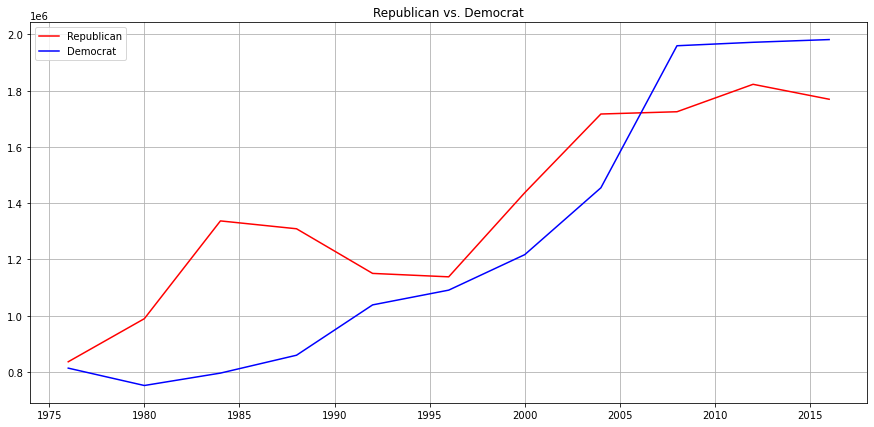

In [15]:
voting_graph('Virginia')
# As you can see from the graph, virginia has historically voted for Republicans. Only in the past two elections has Virginia voted for Democrats.

In [16]:
# Create bar chart between Republicans and Democrats in election years. 
def state_chart(x=''):
    state_name = df[df['state']==x]
    rep = state_name[state_name['party']=='republican']
    dem = state_name[state_name['party']=='democrat']
    date = ['1976','1980','1984','1988','1992','1996','2000','2004','2008','2012','2016']
    N = 11
    width = .1
    ind = np.arange(len(date))
    plt.bar(ind - 0.2, rep.candidatevotes, width=.4, label='Rep',color='red')
    plt.bar(ind + 0.2, dem.candidatevotes, width=.4, label='Dem',color='blue')
    plt.ylabel('Votes')
    plt.xlabel('Year')
    plt.title('Republican vs Democrat Votes')
    plt.xticks(ind,date)
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()
    

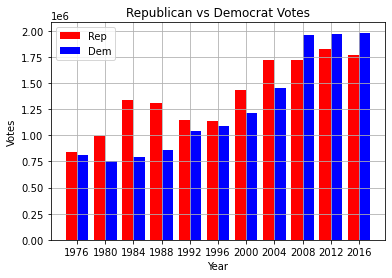

In [17]:
state_chart('Virginia')

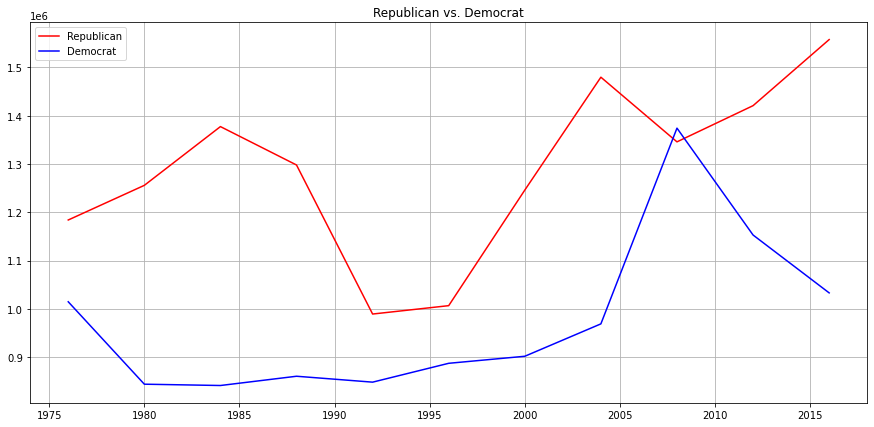

In [18]:
voting_graph('Indiana')

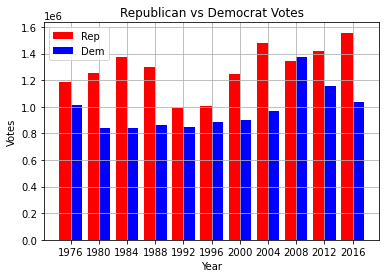

In [19]:
state_chart('Indiana')